###

In [1]:
import pandas as pd
df = pd.read_csv(r'../data/PdM_merged.csv')

### Umwandelung in Integer-Werte

In [2]:
# errorID, failire und comp sind nicht numerisch und müssen umgewandelt werden
# Wenn NaN dann 0, sonst wenn errorID = error1 dann 1, errorID = error2 dann 2, errorID = error3 dann 3,....

df['errorID'] = df['errorID'].fillna(0)
df['errorID'] = df['errorID'].replace('error1', 1)
df['errorID'] = df['errorID'].replace('error2', 2)
df['errorID'] = df['errorID'].replace('error3', 3)
df['errorID'] = df['errorID'].replace('error4', 4)
df['errorID'] = df['errorID'].replace('error5', 5)

df['failure'] = df['failure'].fillna(0)
df['failure'] = df['failure'].replace('comp1', 1)
df['failure'] = df['failure'].replace('comp2', 2)
df['failure'] = df['failure'].replace('comp3', 3)
df['failure'] = df['failure'].replace('comp4', 4)

df['comp'] = df['comp'].fillna(0)
df['comp'] = df['comp'].replace('comp1', 1)
df['comp'] = df['comp'].replace('comp2', 2)
df['comp'] = df['comp'].replace('comp3', 3)
df['comp'] = df['comp'].replace('comp4', 4)

df['model'] = df['model'].fillna(0)
df['model'] = df['model'].replace('model1', 1)
df['model'] = df['model'].replace('model2', 2)
df['model'] = df['model'].replace('model3', 3)
df['model'] = df['model'].replace('model4', 4)

### Missing Value Treatment

In [3]:
# Testen auf fehlende Werte
print(df.isnull().sum())

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
errorID      0
failure      0
comp         0
model        0
age          0
dtype: int64


Fazit --> Keine fehlende Werte in dem Datensatz vorhanden --> Keine Interpolation oder ähnliches notwendig

### Ausreißer-Analyse (statistisch und dichtebasiert)

### Data Cleaning (Ausreißer identifizieren und entfernen)

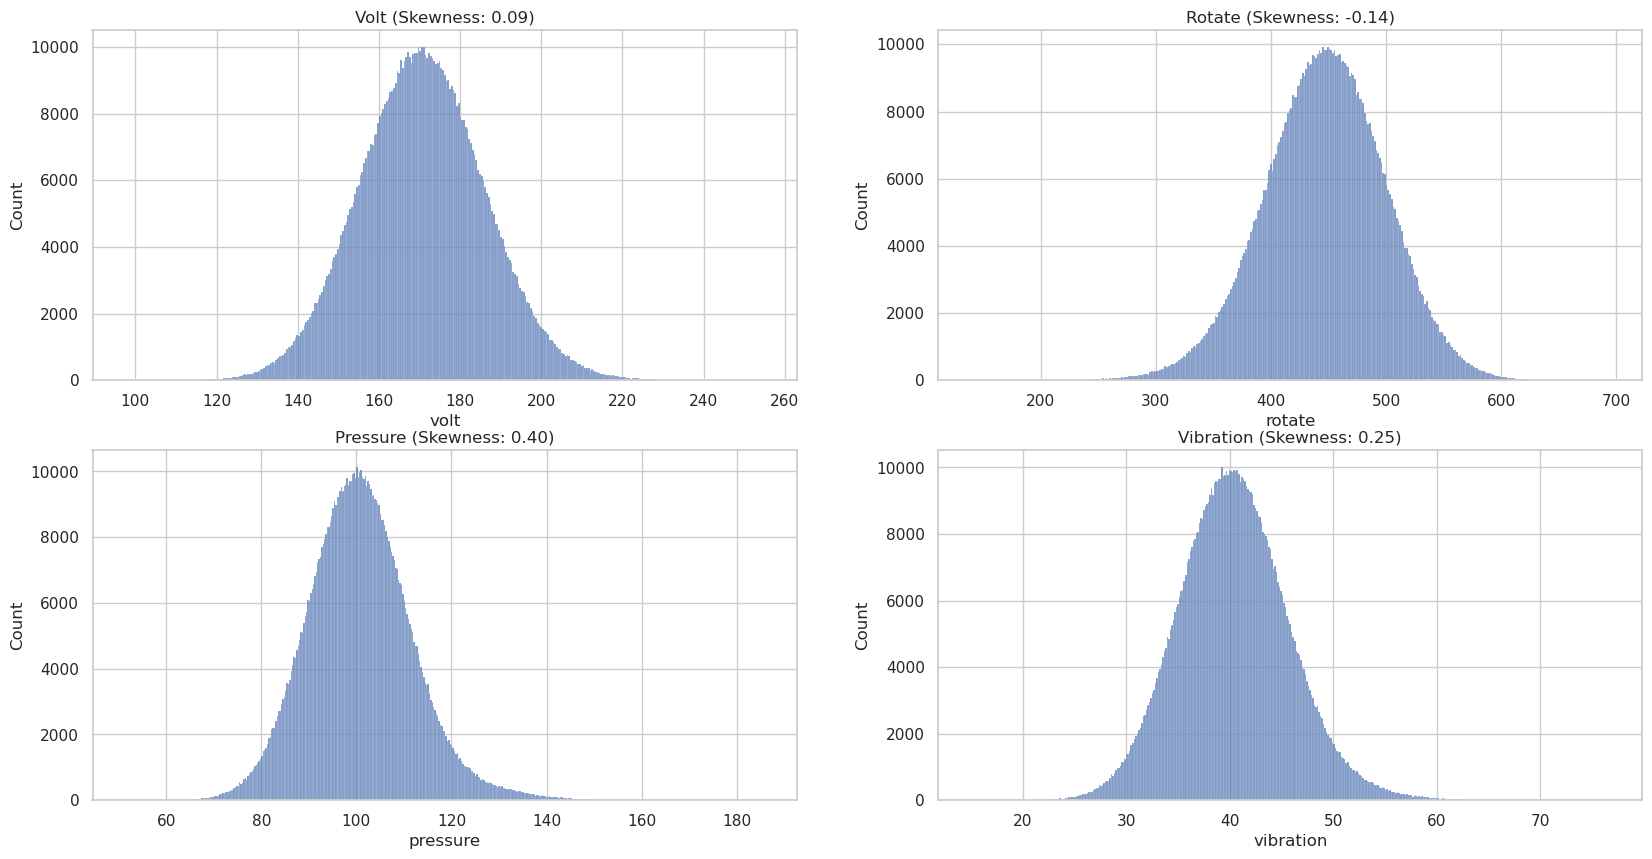

In [ ]:
# Gaußsche Normalverteilung der Attribute (volt, rotate, pressure, vibration)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

# Volt
plt.subplot(2, 2, 1)
sns.histplot(df['volt'])
plt.title(f'Volt (Skewness: {df["volt"].skew():.2f})')

# Rotate
plt.subplot(2, 2, 2)
sns.histplot(df['rotate'])
plt.title(f'Rotate (Skewness: {df["rotate"].skew():.2f})')

# Pressure
plt.subplot(2, 2, 3)
sns.histplot(df['pressure'])
plt.title(f'Pressure (Skewness: {df["pressure"].skew():.2f})')

# Vibration
plt.subplot(2, 2, 4)
sns.histplot(df['vibration'])
plt.title(f'Vibration (Skewness: {df["vibration"].skew():.2f})')

plt.show()


In [5]:
### Ausreißer-Analyse (statistisch und dichtebasiert)

# Statistische Ausreißer-Analyse (Mittelwert, Median und Standardabweichung)

# Mittelwert

print("Volt-Mittelwert: ",df['volt'].mean())
print("Rotation-Mittelwert: ",df['rotate'].mean())
print("Pressure-Mittelwert: ",df['pressure'].mean())
print("Vibration-Mittelwert: ",df['vibration'].mean())

# Median

print("Volt-Median: ",df['volt'].median())
print("Rotation-Median: ",df['rotate'].median())
print("Pressure-Median: ",df['pressure'].median())
print("Vibration-Median: ",df['vibration'].median())

# Standardabweichung

print("Volt-Standardabweichung: ",df['volt'].std())
print("Rotation-Standardabweichung: ",df['rotate'].std())
print("Pressure-Standardabweichung: ",df['pressure'].std())
print("Vibration-Standardabweichung: ",df['vibration'].std())



Volt-Mittelwert:  170.78094187513804
Rotation-Mittelwert:  446.5707350330433
Pressure-Mittelwert:  100.86143292362102
Vibration-Mittelwert:  40.386458969965
Volt-Median:  170.609301144424
Rotation-Median:  447.53753810681
Pressure-Median:  100.426820431081
Vibration-Median:  40.2383389800242
Volt-Standardabweichung:  15.511268213588925
Rotation-Standardabweichung:  52.698962770319774
Pressure-Standardabweichung:  11.0521952150491
Vibration-Standardabweichung:  5.371894442197934


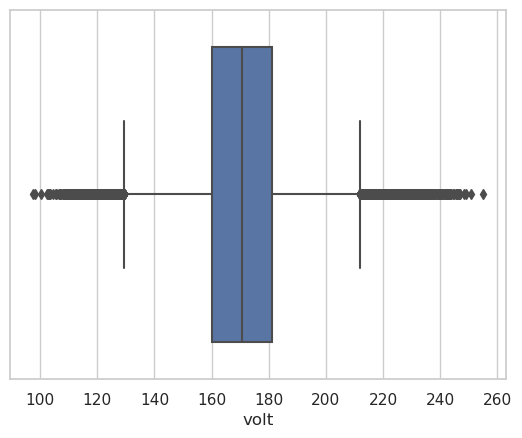

Anzahl der Ausreißer:  7480


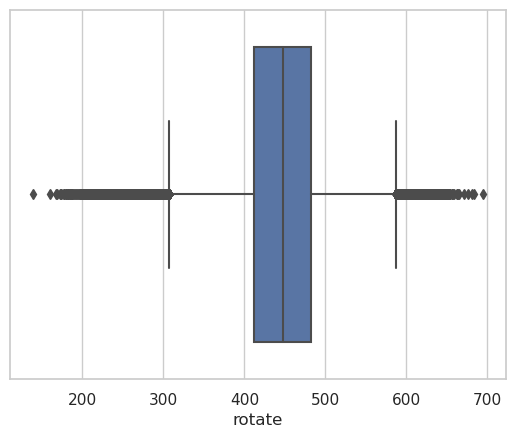

Anzahl der Ausreißer (rotate):  8595


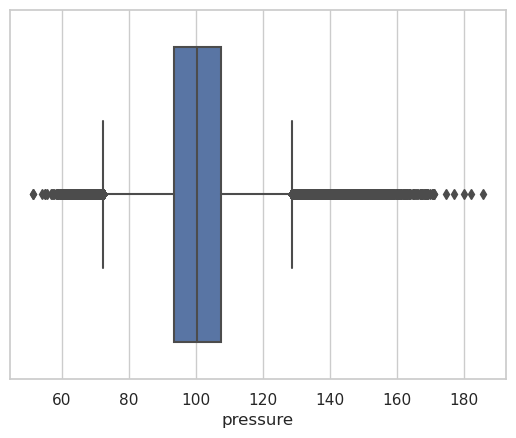

Anzahl der Ausreißer (pressure):  15634


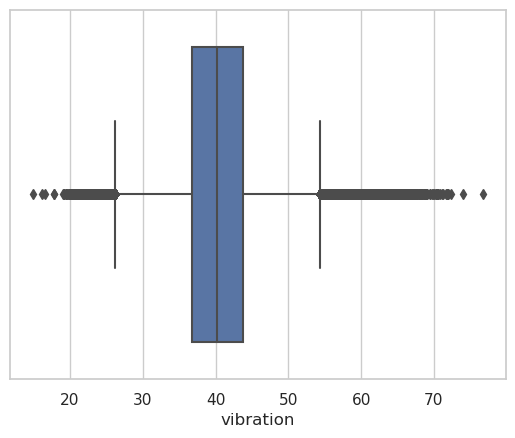

Anzahl der Ausreißer (vibration):  11146


In [6]:
# Ausreißer-Analyse mit Boxplot

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['volt'])
plt.show()

# Anzahl der Ausreißer
Q1_volt = df['volt'].quantile(0.25)
Q3_volt = df['volt'].quantile(0.75)

IQR_volt = Q3_volt - Q1_volt

print("Anzahl der Ausreißer: ", ((df['volt'] < (Q1_volt - 1.5 * IQR_volt)) | (df['volt'] > (Q3_volt + 1.5 * IQR_volt))).sum())
# Ausreißer-Analyse für rotate
sns.boxplot(x=df['rotate'])
plt.show()

Q1_rotate = df['rotate'].quantile(0.25)
Q3_rotate = df['rotate'].quantile(0.75)
IQR_rotate = Q3_rotate - Q1_rotate

print("Anzahl der Ausreißer (rotate): ", ((df['rotate'] < (Q1_rotate - 1.5 * IQR_rotate)) | (df['rotate'] > (Q3_rotate + 1.5 * IQR_rotate))).sum())

# Ausreißer-Analyse für pressure
sns.boxplot(x=df['pressure'])
plt.show()

Q1_pressure = df['pressure'].quantile(0.25)
Q3_pressure = df['pressure'].quantile(0.75)
IQR_pressure = Q3_pressure - Q1_pressure

print("Anzahl der Ausreißer (pressure): ", ((df['pressure'] < (Q1_pressure - 1.5 * IQR_pressure)) | (df['pressure'] > (Q3_pressure + 1.5 * IQR_pressure))).sum())

# Ausreißer-Analyse für vibration
sns.boxplot(x=df['vibration'])
plt.show()

Q1_vibration = df['vibration'].quantile(0.25)
Q3_vibration = df['vibration'].quantile(0.75)
IQR_vibration = Q3_vibration - Q1_vibration

print("Anzahl der Ausreißer (vibration): ", ((df['vibration'] < (Q1_vibration - 1.5 * IQR_vibration)) | (df['vibration'] > (Q3_vibration + 1.5 * IQR_vibration))).sum())

### Datennormalisierung

In [7]:
# Daten normalisieren auf Werte zwischen 0 und 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['volt', 'rotate', 'pressure', 'vibration', 'age']] = scaler.fit_transform(df[['volt', 'rotate', 'pressure', 'vibration', 'age']])

# scaler speichern
import joblib
joblib.dump(scaler, '../data/scaler.pkl')

df.head()

,datetime,machineID,volt,rotate,pressure,vibration,errorID,failure,comp,model,age
0,2015-01-01 06:00:00,1,0.499928,0.503194,0.459050,0.487945,0,0,0,3,0.9
1,2015-01-01 07:00:00,1,0.415395,0.474884,0.328274,0.460912,0,0,0,3,0.9
2,2015-01-01 08:00:00,1,0.466796,0.698752,0.178160,0.311752,0,0,0,3,0.9
3,2015-01-01 09:00:00,1,0.412756,0.373197,0.430624,0.423896,0,0,0,3,0.9
4,2015-01-01 10:00:00,1,0.382001,0.533508,0.450207,0.179498,0,0,0,3,0.9


### Daten Transformation

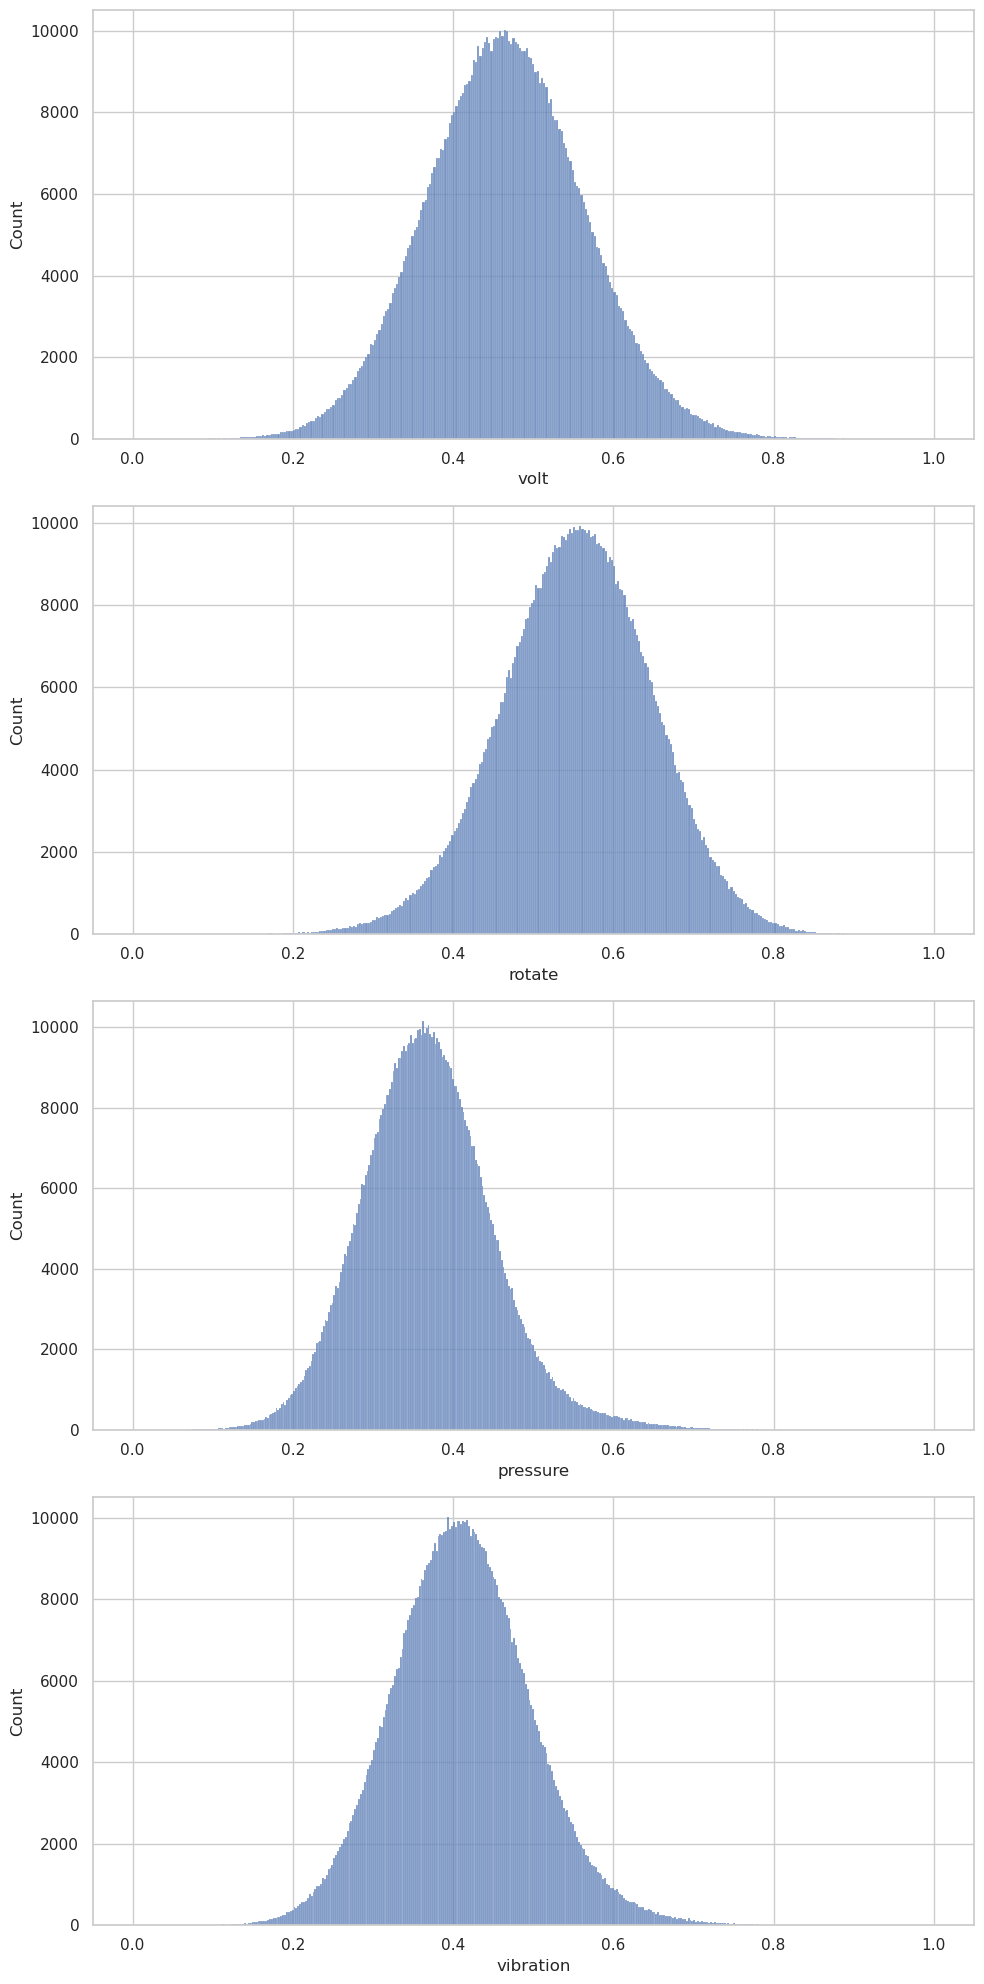

In [8]:
# Gaußsche Normalverteilung der Attribute (volt, rotate, pressure, vibration)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(10, 20))

# Volt
plt.subplot(4, 1, 1)
sns.histplot(df['volt'])

# Rotate
plt.subplot(4, 1, 2)
sns.histplot(df['rotate'])

# Pressure
plt.subplot(4, 1, 3)
sns.histplot(df['pressure'])

# Vibration
plt.subplot(4, 1, 4)
sns.histplot(df['vibration'])

plt.tight_layout()
plt.show()

### Feature Engineering

In [9]:
# Feature Engineering (Volt and Rotate / Pressure and Vibration)

# Volt and Rotate
df['volt_rotate'] = df['volt'] * df['rotate']

# Pressure and Vibration
df['pressure_vibration'] = df['pressure'] * df['vibration']

df.head()

,datetime,machineID,volt,rotate,pressure,vibration,errorID,failure,comp,model,age,volt_rotate,pressure_vibration
0,2015-01-01 06:00:00,1,0.499928,0.503194,0.459050,0.487945,0,0,0,3,0.9,0.251561,0.223991
1,2015-01-01 07:00:00,1,0.415395,0.474884,0.328274,0.460912,0,0,0,3,0.9,0.197265,0.151306
2,2015-01-01 08:00:00,1,0.466796,0.698752,0.178160,0.311752,0,0,0,3,0.9,0.326175,0.055542
3,2015-01-01 09:00:00,1,0.412756,0.373197,0.430624,0.423896,0,0,0,3,0.9,0.154039,0.182540
4,2015-01-01 10:00:00,1,0.382001,0.533508,0.450207,0.179498,0,0,0,3,0.9,0.203801,0.080811


### Feature Importance (ersten 100000 Messwerte)

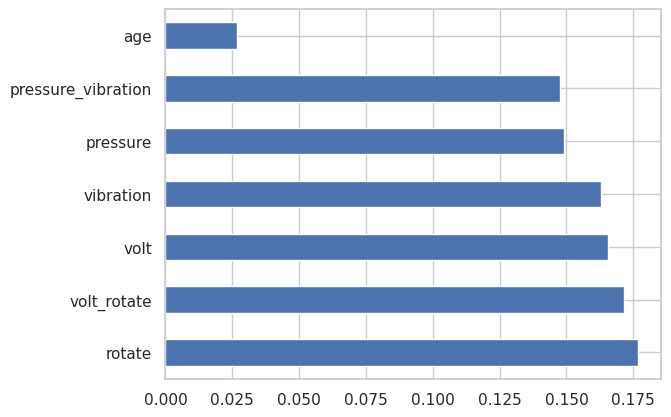

In [10]:
# Feature importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df[['volt', 'rotate', 'pressure', 'vibration', 'age', 'volt_rotate', 'pressure_vibration']].head(100000)
y = df['failure'].head(100000)

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

rf_feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
df.to_pickle("../data/PdM_merged_preprocessed.pkl")